<h1> Navigation </h1>
<a  id="navi"> </a>
<ol>
<li>

[Try all algorithms without modification](#1)</li>
<ul>

[Result](#1_res)
</ul>
<br>

<li>

[kNN](#knn)</li>
<ul> 

[Default parameters](#knn_default) <br>


[Test different n_neighbors, Euclidean metric ](#knn_diff) <br>

[Test different n_neighbors, Minkowski metric, weighted neighbors](#knn_weight_min) <br>

[Test different n_neighbors, Euclidean metric, weighted neighbors](#knn_weight_euc) <br>

[Comparison (Visualization)](#knn_res) <br>
<br>
</ul>

<li>

[kNN and Neural Net](#knn_neural)
<ul>

[Unexpected results!!!](#knn_neural_res)
</ul>


</ul>

<li>

[Back to the heart dataset for a moment](#hearth) <br>

<ul>

[New results](#final)
</li>
<br>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout  
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
pulsar_dataset = pd.read_csv('pulsar_stars.csv')
rng = 42

In [5]:
pulsar_dataset.describe()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [6]:
pulsar_dataset

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


<h3> All known algorithms without modification </h3>

<a id="1"> </a>

[Back to Navigation](#navi)

In [7]:
features_train = pulsar_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    pulsar_dataset[features_train],
    pulsar_dataset.iloc[:, -1],test_size=0.3,shuffle=True,
    random_state=rng)

In [8]:
decision_tree = DecisionTreeClassifier(random_state=rng)
decision_tree.fit(X_train,y_train)
tree_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,tree_pred))
print(classification_report(y_test,tree_pred))

[[4806   78]
 [  76  410]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4884
           1       0.84      0.84      0.84       486

    accuracy                           0.97      5370
   macro avg       0.91      0.91      0.91      5370
weighted avg       0.97      0.97      0.97      5370



In [9]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[4857   27]
 [  79  407]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4884
           1       0.94      0.84      0.88       486

    accuracy                           0.98      5370
   macro avg       0.96      0.92      0.94      5370
weighted avg       0.98      0.98      0.98      5370



In [10]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4863   21]
 [  94  392]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4884
           1       0.95      0.81      0.87       486

    accuracy                           0.98      5370
   macro avg       0.97      0.90      0.93      5370
weighted avg       0.98      0.98      0.98      5370



In [11]:
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
print(confusion_matrix(y_test,KN_pred))
print(classification_report(y_test,KN_pred))

[[4844   40]
 [ 103  383]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4884
           1       0.91      0.79      0.84       486

    accuracy                           0.97      5370
   macro avg       0.94      0.89      0.91      5370
weighted avg       0.97      0.97      0.97      5370



In [12]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y2_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y2_pred))
print(classification_report(y_test,y2_pred))

[[4851   33]
 [ 115  371]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4884
           1       0.92      0.76      0.83       486

    accuracy                           0.97      5370
   macro avg       0.95      0.88      0.91      5370
weighted avg       0.97      0.97      0.97      5370



In [13]:
regr = LogisticRegression() 
regr.fit(X_train, y_train)
Log_pred = regr.predict(X_test)
print(confusion_matrix(y_test,Log_pred))
print(classification_report(y_test,Log_pred))

[[4859   25]
 [  87  399]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4884
           1       0.94      0.82      0.88       486

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, \
                          verbose=1, mode='auto')

callbacks_list = [earlystop]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=50, batch_size=64)

Epoch 1/50


c:\Users\Василий\.pyenv\pyenv-win\versions\3.10.8\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


128/128 [==============================] - 1s 3ms/step - loss: 2.3102 - accuracy: 0.7744 - val_loss: 0.4713 - val_accuracy: 0.9209
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.9315 - val_loss: 0.2695 - val_accuracy: 0.9471
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.9481 - val_loss: 0.2355 - val_accuracy: 0.9608
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.9579 - val_loss: 0.2228 - val_accuracy: 0.9599
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9616 - val_loss: 0.2036 - val_accuracy: 0.9660
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9649 - val_loss: 0.1907 - val_accuracy: 0.9685
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.9672 - val_loss: 0.1789 - val_accuracy: 0.9683
Epoch 8/50
128/12

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


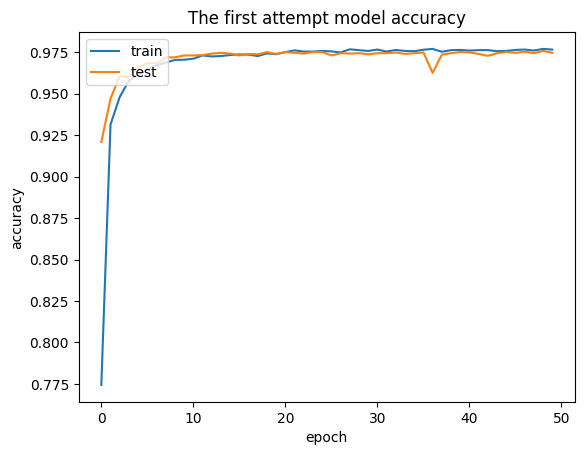

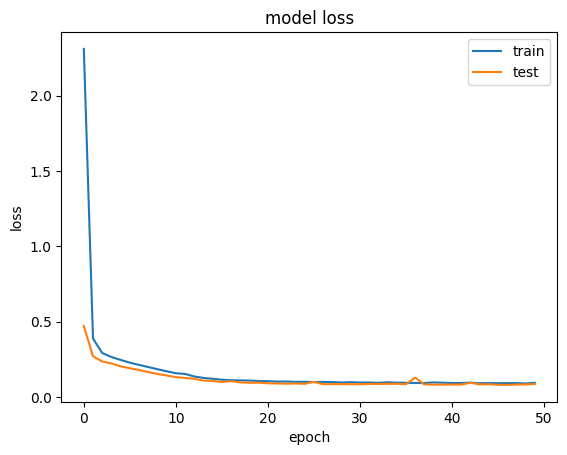

In [15]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('The first attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<h3>Result</h3>
The first attempt
<a  id="1_res"> </a>

[Back to Navigation](#navi)

In [16]:
print('Decision Tree:', accuracy_score(y_test, tree_pred)*100,'%')
print('Random Forest:', accuracy_score(y_test, rf_pred)*100,'%')
print('KNeighbors:',accuracy_score(y_test, KN_pred)*100,'%')
print('SVM:',accuracy_score(y_test, y_pred)*100,'%')
print('Non-Linear SVM', accuracy_score(y_test, y2_pred)*100, '%')
print('Log Ress', accuracy_score(y_test, Log_pred)*100, '%')
print('Neural Net', np.mean(model_without_early.history['val_accuracy'][-5:])*100, '%')


Decision Tree: 97.13221601489758 %
Random Forest: 98.02607076350093 %
KNeighbors: 97.33705772811918 %
SVM: 97.8584729981378 %
Non-Linear SVM 97.243947858473 %
Log Ress 97.91433891992551 %


<h3> kNN </h3>

<a id="knn"> </a>

[Back to Navigation](#navi)

In [17]:
# We need to normalize the data before using kNN

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(pulsar_dataset)
scaled_pulsar_dataset = pd.DataFrame(data=scaler.transform(pulsar_dataset),columns = pulsar_dataset.columns,index=pulsar_dataset.index)

In [18]:
scaled_pulsar_dataset

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0.0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0.0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0.0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0.0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0.0
...,...,...,...,...,...,...,...,...,...
17893,0.699218,0.473948,0.169741,0.015077,0.004855,0.046437,0.493364,0.241336,0.0
17894,0.624942,0.333936,0.201496,0.030260,0.072572,0.360761,0.161482,0.008612,0.0
17895,0.607712,0.475144,0.204652,0.015007,0.095069,0.498699,0.149653,0.005509,0.0
17896,0.581866,0.393617,0.208855,0.025283,0.007766,0.058209,0.348926,0.114181,0.0


In [19]:
features_train = scaled_pulsar_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    scaled_pulsar_dataset[features_train],
    scaled_pulsar_dataset.iloc[:, -1],test_size=0.3,shuffle=True,
    random_state=rng)

In [20]:
def print_pretty_cf_matrix(y_test, y_predict):
    cf_matrix = confusion_matrix(y_test, y_predict)
    group_names = ['True Pos','False Pos','False Neg','True Neg']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Real','Fake'])
    ax.yaxis.set_ticklabels(['Real','Fake'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

<a id="knn_default"> </a>

Accuracy: 97.82122905027933
The default value of k (k = 5)


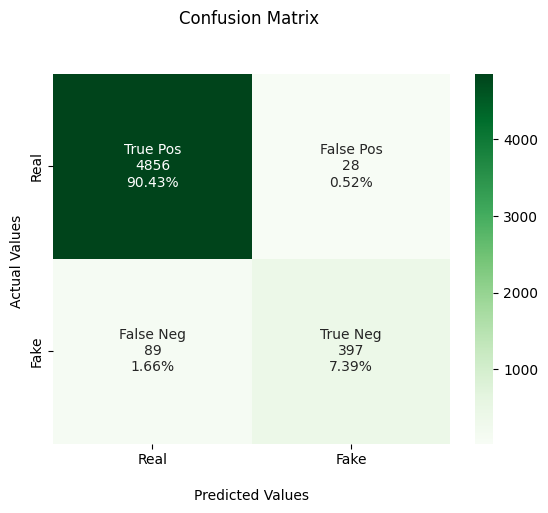

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      4884
         1.0       0.93      0.82      0.87       486

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



In [21]:
#What we have. Euclidean metric, k = 5
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test, KN_pred)*100}")
print("The default value of k (k = 5)")
print_pretty_cf_matrix(y_test,KN_pred)
print(classification_report(y_test,KN_pred))

df_knn_res = pd.DataFrame([[5, accuracy_score(y_test, KN_pred)*100]], 
                        columns=['n_neighbors', 'accuracy'])

<a id="knn_diff"> </a>

The best k here is 11 with accuracy 97.97020484171323


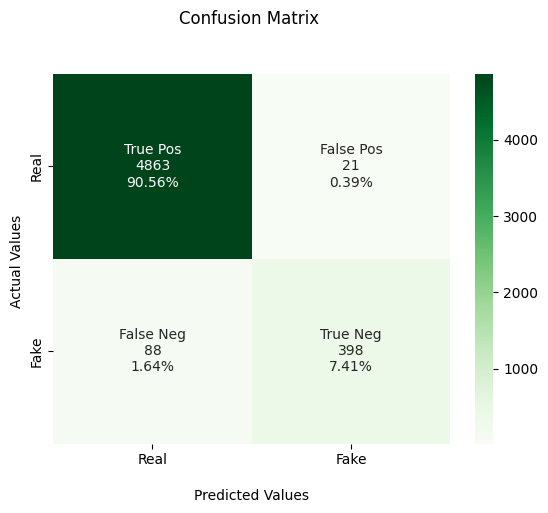

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4884
         1.0       0.95      0.82      0.88       486

    accuracy                           0.98      5370
   macro avg       0.97      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370



In [22]:
# Let's try different numbers of neighbors. I save the k with the max accuracy.
# Euclidean metric
max_accuracy = -1
for k in range(3, 27, 2):
    KN = KNeighborsClassifier(n_neighbors=k)
    KN.fit(X_train,y_train)
    KN_pred = KN.predict(X_test)
    if max_accuracy < accuracy_score(y_test, KN_pred)*100:
        max_accuracy = accuracy_score(y_test, KN_pred)*100
        best_k = k

print(f"The best k here is {best_k} with accuracy {max_accuracy}" )
KN = KNeighborsClassifier(n_neighbors=best_k)
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
print_pretty_cf_matrix(y_test,KN_pred)
print(classification_report(y_test,KN_pred))

df_knn_res = pd.concat([df_knn_res, pd.DataFrame([[best_k, accuracy_score(y_test, KN_pred)*100]], 
                        columns=['n_neighbors', 'accuracy'])], ignore_index=True)

<a id="knn_weight_min"> </a>

The best k here is 9 with accuracy 98.02607076350093


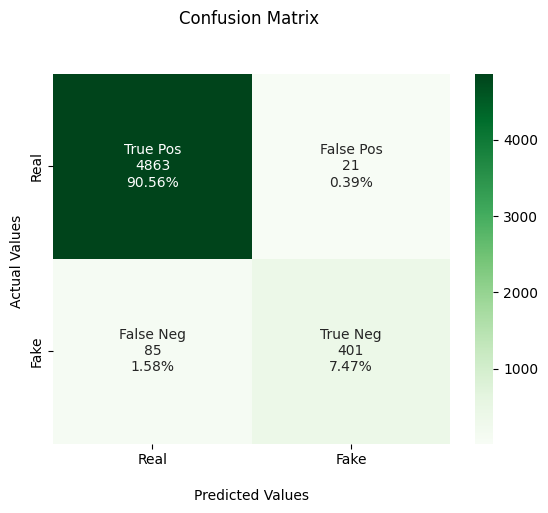

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4884
         1.0       0.95      0.83      0.88       486

    accuracy                           0.98      5370
   macro avg       0.97      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370



In [23]:
# Close neighbors have bigger weight, Minkowski metric
max_accuracy = -1
for k in range(3, 27, 2):
    KN = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    KN.fit(X_train,y_train)
    KN_pred = KN.predict(X_test)
    if max_accuracy < accuracy_score(y_test, KN_pred)*100:
        max_accuracy = accuracy_score(y_test, KN_pred)*100
        best_k = k

print(f"The best k here is {best_k} with accuracy {max_accuracy}" )
KN = KNeighborsClassifier(n_neighbors=best_k,  weights='distance', p=1)
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
print_pretty_cf_matrix(y_test,KN_pred)
print(classification_report(y_test,KN_pred))

df_knn_res = pd.concat([df_knn_res, pd.DataFrame([[best_k, accuracy_score(y_test, KN_pred)*100]], 
                        columns=['n_neighbors', 'accuracy'])], ignore_index=True)

<a id="knn_weight_euc"> </a>

The best k here is 13 with accuracy 98.04469273743017


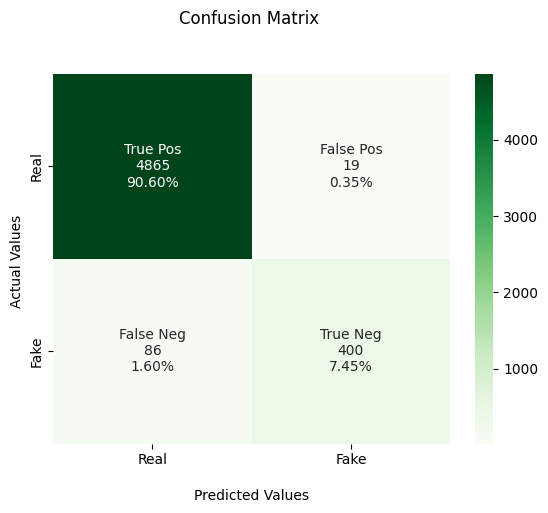

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4884
         1.0       0.95      0.82      0.88       486

    accuracy                           0.98      5370
   macro avg       0.97      0.91      0.94      5370
weighted avg       0.98      0.98      0.98      5370



In [24]:
# Close neighbors have bigger weight, Euclidean metric
max_accuracy = -1
for k in range(3, 27, 2):
    KN = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    KN.fit(X_train,y_train)
    KN_pred = KN.predict(X_test)
    if max_accuracy < accuracy_score(y_test, KN_pred)*100:
        max_accuracy = accuracy_score(y_test, KN_pred)*100
        best_k = k

print(f"The best k here is {best_k} with accuracy {max_accuracy}" )
KN = KNeighborsClassifier(n_neighbors=best_k, weights='distance', p=2)
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
print_pretty_cf_matrix(y_test,KN_pred)
print(classification_report(y_test,KN_pred))

df_knn_res = pd.concat([df_knn_res, pd.DataFrame([[best_k, accuracy_score(y_test, KN_pred)*100]], 
                        columns=['n_neighbors', 'accuracy'])], ignore_index=True)

In [25]:
df_knn_res

,n_neighbors,accuracy
0,5,97.821229
1,11,97.970205
2,9,98.026071
3,13,98.044693


<a id="knn_res"> </a>

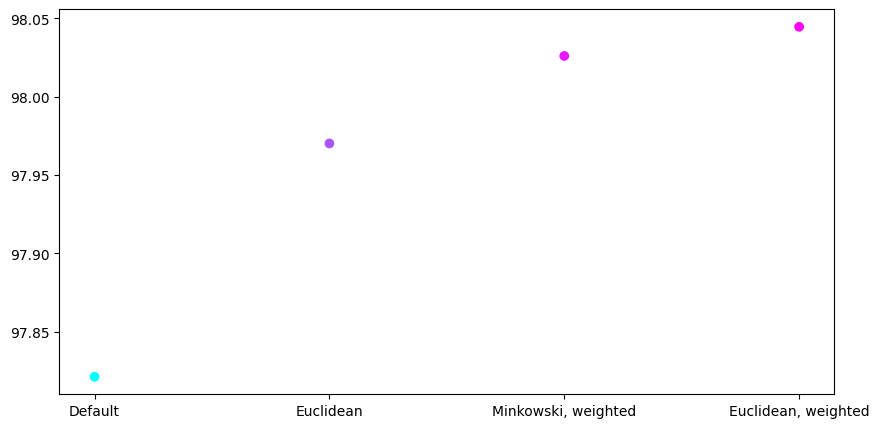

In [26]:
import warnings
warnings.filterwarnings('ignore')


colors = ['#789644','#968E44', '#B0E35B', '#E34F8A']

description = ['Default', 'Euclidean', 'Minkowski, weighted', 
                'Euclidean, weighted']

plt.figure(figsize=(10,5))
plt.scatter(description, df_knn_res.accuracy, c=df_knn_res.accuracy ,cmap='cool')


plt.show()

<h3> Neural net and kNN </h3>

<a id="knn_neural"> </a>

We got the best results with n_neighbors = 13, Euclidean metric and weighted neighbors.
I'll add an extra column with predictions based on that model

In [27]:
features_train = scaled_pulsar_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    scaled_pulsar_dataset[features_train],
    scaled_pulsar_dataset.iloc[:, -1],test_size=0.5,shuffle=True,
    random_state=rng)

In [28]:
KN = KNeighborsClassifier(n_neighbors=best_k, weights='distance', p=2)
KN.fit(X_train,y_train)
KN_pred = KN.predict(scaled_pulsar_dataset.iloc[:,:-1])

scaled_knn_dataset = scaled_pulsar_dataset.copy()
scaled_knn_dataset.insert(scaled_knn_dataset.shape[1]- 1, 'knn result', KN_pred)
scaled_knn_dataset

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,knn result,target_class
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0.0,0.0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0.0,0.0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0.0,0.0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0.0,0.0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17893,0.699218,0.473948,0.169741,0.015077,0.004855,0.046437,0.493364,0.241336,0.0,0.0
17894,0.624942,0.333936,0.201496,0.030260,0.072572,0.360761,0.161482,0.008612,0.0,0.0
17895,0.607712,0.475144,0.204652,0.015007,0.095069,0.498699,0.149653,0.005509,0.0,0.0
17896,0.581866,0.393617,0.208855,0.025283,0.007766,0.058209,0.348926,0.114181,0.0,0.0


In [29]:
features_train = scaled_knn_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    scaled_knn_dataset[features_train],
    pulsar_dataset.iloc[:, -1],test_size=0.3,shuffle=True,
    random_state=rng)

In [30]:
model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, \
                          verbose=1, mode='auto')

callbacks_list = [earlystop]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=50, batch_size=64)

Epoch 1/50
128/128 [==============================] - 1s 5ms/step - loss: 0.4989 - accuracy: 0.9080 - val_loss: 0.4011 - val_accuracy: 0.9074
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.9083 - val_loss: 0.2721 - val_accuracy: 0.9074
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9083 - val_loss: 0.1866 - val_accuracy: 0.9104
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9429 - val_loss: 0.1291 - val_accuracy: 0.9651
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1232 - accuracy: 0.9722 - val_loss: 0.0924 - val_accuracy: 0.9824
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9804 - val_loss: 0.0690 - val_accuracy: 0.9893
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9844 - val_loss: 0.0540 - val_accuracy: 0.9918
Epoch 

<a id="knn_neural_res"> </a>

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


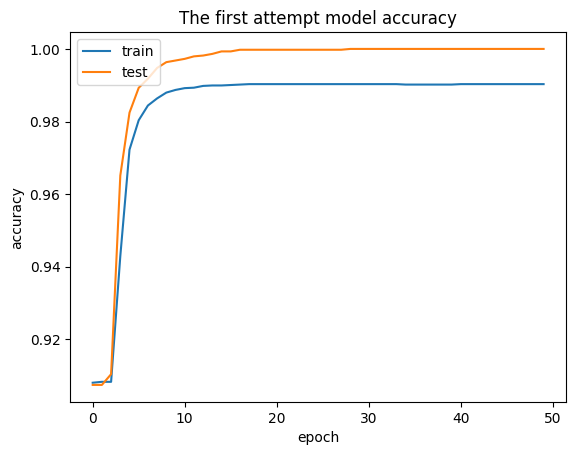

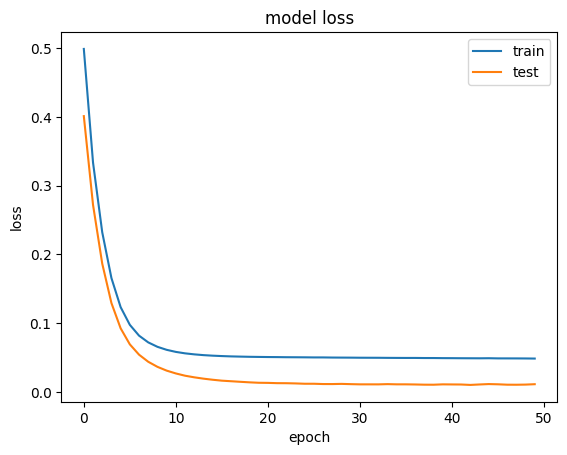

In [31]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('The first attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
print('Neural Net accuracy:', np.mean(model_without_early.history['val_accuracy'][-10:])*100, '%')

Neural Net accuracy: 100.0 %


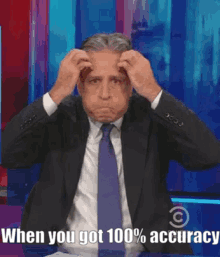

In [33]:
# I hope i didn't miss anything...

from IPython.display import Image
Image(filename="stephen-colbert-overwhelmed.gif")

<h3> Let's try the same tactic with the heart dataset </h3>

<a id="hearth"> </a>

In [34]:
heart_disease_dataset = pd.read_csv('HeartDiseaseDataset.csv')

In [35]:
from sklearn.preprocessing import MinMaxScaler


features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = MinMaxScaler()
scaler.fit(heart_disease_dataset[features_to_scale])
scaled_features = pd.DataFrame(
    data=scaler.transform(heart_disease_dataset[features_to_scale]),
    columns = heart_disease_dataset[features_to_scale].columns,
    index=heart_disease_dataset[features_to_scale].index)
    
scaled_dataset = heart_disease_dataset.copy()
scaled_dataset[features_to_scale] = scaled_features

In [36]:
feature_dummies = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = scaled_dataset.copy()
for feature in feature_dummies:
    dummies = pd.get_dummies(scaled_dataset[feature], prefix=feature)
    df = pd.concat([df, dummies], axis = 1)
    df.drop(feature, axis=1, inplace=True)
scaled_dummy_dataset = df.copy()
scaled_dummy_dataset = scaled_dummy_dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'target']]
scaled_dummy_dataset.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [37]:
features_train = scaled_dummy_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    scaled_dummy_dataset[features_train],
    scaled_dummy_dataset.target,test_size=0.3,shuffle=True, random_state=rng)

The best k here is 9 with accuracy 85.71428571428571


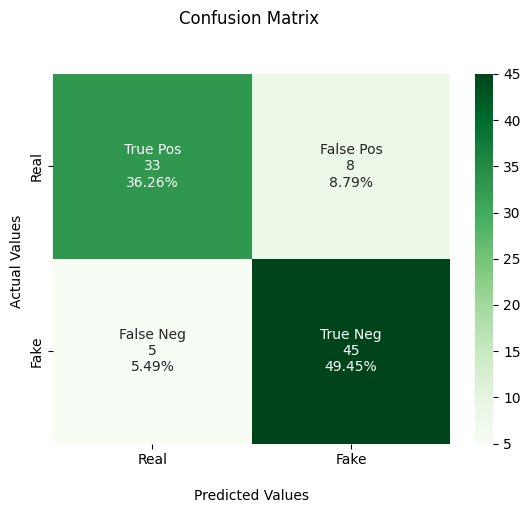

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [38]:
max_accuracy = -1
for k in range(3, 27, 2):
    KN = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2)
    KN.fit(X_train,y_train)
    KN_pred = KN.predict(X_test)
    if max_accuracy < accuracy_score(y_test, KN_pred)*100:
        max_accuracy = accuracy_score(y_test, KN_pred)*100
        best_k = k

print(f"The best k here is {best_k} with accuracy {max_accuracy}" )
KN = KNeighborsClassifier(n_neighbors=best_k, weights='distance', p=2)
KN.fit(X_train,y_train)
KN_pred = KN.predict(X_test)
print_pretty_cf_matrix(y_test,KN_pred)
print(classification_report(y_test,KN_pred))

In [39]:
features_train = scaled_dummy_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    scaled_dummy_dataset[features_train],
    scaled_dummy_dataset.target,test_size=0.5,shuffle=True, random_state=rng)

In [40]:
KN = KNeighborsClassifier(n_neighbors=best_k, weights='distance', p=2)
KN.fit(X_train,y_train)
KN_pred = KN.predict(scaled_dummy_dataset.iloc[:,:-1])

In [41]:
hearth_dataset = scaled_dummy_dataset.copy()
hearth_dataset.insert(hearth_dataset.shape[1]- 1, 'knn result', KN_pred)
hearth_dataset

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,knn result,target
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,1
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0.333333,0.150943,0.315068,0.465649,0.193548,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
300,0.812500,0.471698,0.152968,0.534351,0.548387,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
301,0.583333,0.339623,0.011416,0.335878,0.193548,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
features_train = hearth_dataset.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(
    hearth_dataset[features_train],
    hearth_dataset.target,test_size=0.3,shuffle=True, random_state=rng)

In [43]:
model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=8, \
                          verbose=1, mode='auto')

callbacks_list = [earlystop]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_without_early=model.fit(X_train, y_train, validation_split=0.35, epochs=250, batch_size=64)

Epoch 1/250
3/3 [==============================] - 1s 86ms/step - loss: 0.7960 - accuracy: 0.4526 - val_loss: 0.7696 - val_accuracy: 0.4800
Epoch 2/250
3/3 [==============================] - 0s 17ms/step - loss: 0.7795 - accuracy: 0.4526 - val_loss: 0.7540 - val_accuracy: 0.4933
Epoch 3/250
3/3 [==============================] - 0s 17ms/step - loss: 0.7651 - accuracy: 0.4453 - val_loss: 0.7395 - val_accuracy: 0.4933
Epoch 4/250
3/3 [==============================] - 0s 16ms/step - loss: 0.7505 - accuracy: 0.4526 - val_loss: 0.7264 - val_accuracy: 0.4933
Epoch 5/250
3/3 [==============================] - 0s 15ms/step - loss: 0.7377 - accuracy: 0.4599 - val_loss: 0.7140 - val_accuracy: 0.5067
Epoch 6/250
3/3 [==============================] - 0s 16ms/step - loss: 0.7256 - accuracy: 0.4818 - val_loss: 0.7026 - val_accuracy: 0.5067
Epoch 7/250
3/3 [==============================] - 0s 16ms/step - loss: 0.7146 - accuracy: 0.4964 - val_loss: 0.6927 - val_accuracy: 0.5200
Epoch 8/250
3/3 [===

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


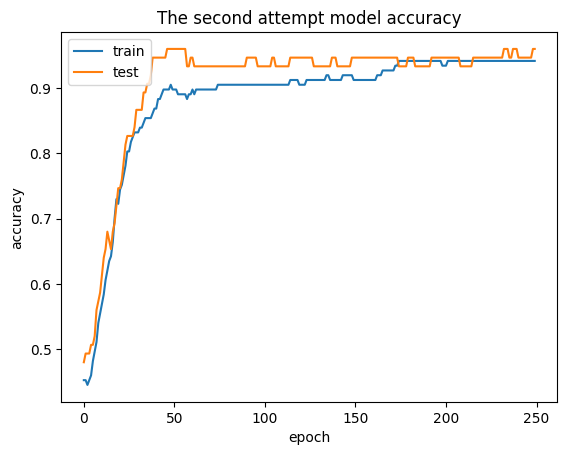

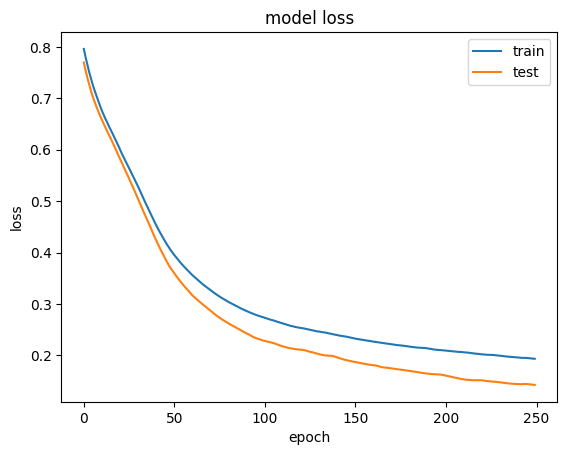

In [44]:
print(model_without_early.history.keys())
# summarize history for accuracy
plt.plot(model_without_early.history['accuracy'])
plt.plot(model_without_early.history['val_accuracy'])
plt.title('The second attempt model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_without_early.history['loss'])
plt.plot(model_without_early.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

<a id="final"> </a>

In [45]:
# Honestly, this result in't always so good... However, I got test accuracy 
# more than 90 almost every time
print('Neural Net', np.mean(model_without_early.history['val_accuracy'][-5:])*100, '%')

Neural Net 95.19999861717224 %
